In [76]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.cm as mcm

In [58]:
df = pd.read_csv("ALL_2019.csv")

In [59]:
df['observedF'] = (df['observed']/10) *(9/5) + 32

In [60]:
df.head()

,station,date,observed,6,9,12,15,18,21,24,...,42,45,48,51,54,57,60,66,72,observedF
0,KGPI,2019-01-01,-74,17.333333,18.0,15.5,17.5,19.0,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.68
1,KGPI,2019-01-02,-46,23.000000,23.2,23.2,23.2,23.2,24.6,22.0,...,25.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.72
2,KGPI,2019-01-03,-3,28.200000,29.6,29.4,29.2,30.6,31.2,30.6,...,30.2,32.4,30.0,29.75,27.333333,29.333333,28.5,33.0,NaN,31.46
3,KGPI,2019-01-04,38,38.800000,38.0,37.0,37.0,37.4,38.2,35.8,...,34.4,35.8,35.2,34.00,33.600000,33.200000,32.8,33.6,34.5,38.84
4,KGPI,2019-01-05,3,34.200000,32.4,33.4,33.0,34.6,35.8,36.2,...,31.8,32.8,33.6,32.60,32.000000,31.400000,32.2,32.4,33.0,32.54


In [61]:
data = df.pivot(index='station', columns = 'date', values='observedF')

In [62]:
data.head()

date,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
station,,,,,,,,,,,,,,,,,,,,,
KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.58,38.12,40.82,33.26,33.98,43.88,41.72,37.40,40.64,40.10
KABI,34.16,27.86,32.72,41.36,50.72,56.30,62.96,52.88,46.58,50.72,...,43.88,51.26,55.76,57.92,55.04,61.52,60.62,46.40,39.38,39.20
KABQ,24.26,18.68,20.12,24.62,28.76,34.88,35.24,35.96,36.68,38.30,...,35.06,33.98,36.68,38.30,37.58,44.06,34.16,28.22,25.70,29.84
KABR,-4.72,9.50,24.62,26.24,32.18,27.14,34.34,29.48,10.58,11.84,...,24.80,25.70,23.72,21.92,23.36,22.82,24.98,26.96,20.12,15.62
KACT,41.90,35.78,37.04,42.98,46.22,51.80,64.22,55.04,50.90,45.68,...,42.26,42.44,47.66,52.88,53.06,60.62,62.42,51.98,42.26,42.08


In [63]:
dclean = data.dropna() #kmeans doesn't work on NaN so we remove those stations

In [64]:
# basing cluster # on # of regions
kmeans = KMeans(n_clusters=10, random_state=0)
    

In [65]:
kmeans.fit(dclean.values)

KMeans(n_clusters=10, random_state=0)

In [66]:
dclean['label'] = kmeans.labels_

<ipython-input-66-1fdbc3f47dc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dclean['label'] = kmeans.labels_


In [67]:
dclean['label'].reset_index().head()

,station,label
0,KABI,9
1,KABQ,4
2,KABR,8
3,KAGS,9
4,KAHN,9


In [68]:
dfg = pd.read_csv("ghcn_mos_lookup.csv")
dfg.head()

,Unnamed: 0,ID,LATITUDE,LONGITUDE,Station,Latitude,Longitude
0,0,USC00026180,36.9208,-111.4483,KPGA,36.9333,-111.4500
1,1,USW00003162,36.9261,-111.4478,KPGA,36.9333,-111.4500
2,2,USC00080211,29.7258,-85.0206,KAAF,29.7333,-85.0167
3,3,USW00012832,29.7333,-85.0333,KAAF,29.7333,-85.0167
4,4,USC00088782,27.7053,-82.4008,KMCF,27.8500,-82.5000


In [69]:
labeled = pd.merge(dclean['label'], dfg[['Station', 'Latitude', 'Longitude']], 
         left_index=True, right_on='Station', how='inner')
labeled.head()

,label,Station,Latitude,Longitude
261,9,KABI,32.4167,-99.6833
368,4,KABQ,35.0500,-106.6167
337,8,KABR,45.4500,-98.4333
338,8,KABR,45.4500,-98.4333
114,9,KAGS,33.3667,-81.9667


In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geolab = gpd.GeoDataFrame(labeled, geometry=gpd.points_from_xy(labeled['Longitude'], labeled['Latitude']))

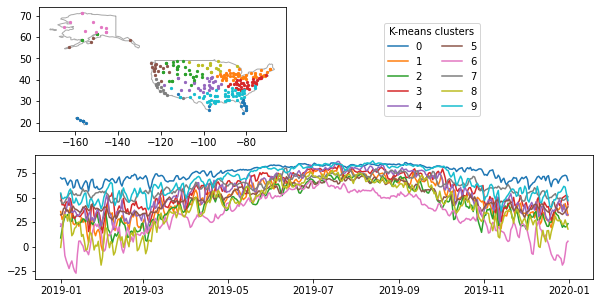

In [117]:
fig, axd = plt.subplot_mosaic([['map', '.'], ['time', 'time']], figsize=(10,5))
world[world['iso_a3'].str.match('USA')].plot(ax=axd['map'], color='white', edgecolor='darkgrey')

features = pd.to_datetime(dclean.columns.drop('label'))

for l in sorted(geolab['label'].unique()):
    geolab[geolab['label']==l].plot(ax=axd['map'], color=mcm.tab10(l), markersize=5)
    h, = axd['time'].plot(features, kmeans.cluster_centers_[l], color=mcm.tab10(l), label=l)

_ = fig.legend(title='K-means clusters', ncol=2, bbox_to_anchor=(.75,.85))
